In [1]:
# Setelah di-upload, baca dataset dengan pandas
import pandas as pd

# Ganti 'nama_file.csv' sesuai nama file kamu
# df = pd.read_csv('Shopping Mall Customer Segmentation Data .csv')
df = pd.read_csv('retail_data.csv')

# Tampilkan 5 data teratas
df.head()

,CustomerID,Age,Gender,Annual_Income,Spending_Score,ProductCategory,ProductPrice,PurchaseDate,StoreID,StoreLocation,PaymentMethod,DiscountApplied,DiscountPercent,ProductCost,Profit,FootTraffic,InventoryLevel,MarketingExpenditure,CompetitorPrice
0,1,58,Male,60038,41,Health & Beauty,147.43,2022-06-11,46,San Jose,Credit Card,True,26,109.10,38.33,336,26,9107.90,171.55
1,2,57,Male,31577,91,Health & Beauty,402.09,2023-06-05,53,Los Angeles,Mobile Payment,True,1,398.07,4.02,491,32,1746.77,419.19
2,3,39,Female,117404,26,Groceries,958.45,2020-10-14,95,Philadelphia,Mobile Payment,False,0,958.45,0.00,157,3,2030.49,835.92
3,4,33,Male,87434,94,Electronics,544.17,2021-08-27,24,Dallas,Credit Card,False,0,544.17,0.00,223,87,6242.68,620.36
4,5,18,Male,90225,10,Health & Beauty,645.75,2023-06-06,2,San Antonio,Credit Card,False,0,645.75,0.00,315,8,6008.89,600.49


In [2]:
# Cek dimensi dan tipe data
print("Ukuran dataset:", df.shape)
print("\nTipe data:")
print(df.dtypes)

# Pilih hanya 6 atribut numerik yang digunakan untuk clustering
selected_features = ['Age', 'Annual_Income', 'Spending_Score']

data = df[selected_features]
print("\nStatistik deskriptif fitur yang dipilih:")
print(data.describe())

Ukuran dataset: (200000, 19)

Tipe data:
CustomerID                int64
Age                       int64
Gender                   object
Annual_Income             int64
Spending_Score            int64
ProductCategory          object
ProductPrice            float64
PurchaseDate             object
StoreID                   int64
StoreLocation            object
PaymentMethod            object
DiscountApplied            bool
DiscountPercent           int64
ProductCost             float64
Profit                  float64
FootTraffic               int64
InventoryLevel            int64
MarketingExpenditure    float64
CompetitorPrice         float64
dtype: object

Statistik deskriptif fitur yang dipilih:
                 Age  Annual_Income  Spending_Score
count  200000.000000  200000.000000   200000.000000
mean       43.969475   85058.438785       50.417900
std        15.277401   37511.311914       28.864392
min        18.000000   20001.000000        1.000000
25%        31.000000   52577.000000

In [3]:
# Tahap 2: Normalisasi menggunakan Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Konversi ke DataFrame agar lebih mudah dibaca
import numpy as np
data_scaled_df = pd.DataFrame(data_scaled, columns=selected_features)
data_scaled_df.head()

,Age,Annual_Income,Spending_Score
0,0.769231,0.307979,0.404040
1,0.750000,0.089047,0.909091
2,0.403846,0.749260,0.252525
3,0.288462,0.518719,0.939394
4,0.000000,0.540189,0.090909


C:\Users\satria\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\satria\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


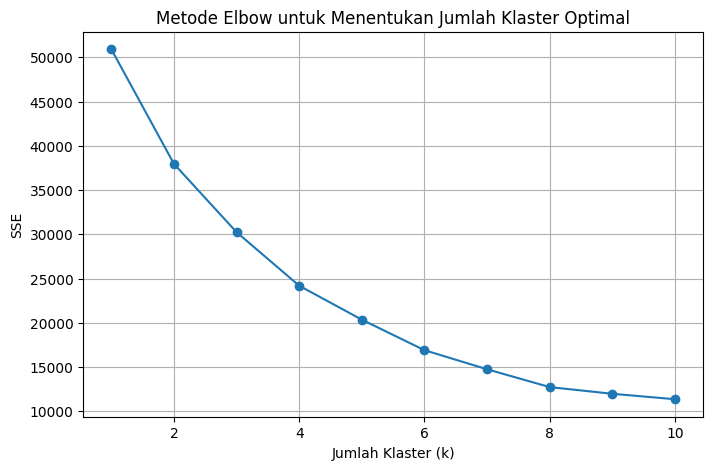

In [4]:
# Tahap 3: Menentukan jumlah klaster optimal dengan Elbow Method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Visualisasi metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.grid(True)
plt.show()

In [5]:
# Tahap 4: Evaluasi dengan Silhouette Score untuk k=2 sampai k=10
from sklearn.metrics import silhouette_score

print("\nEvaluasi Silhouette Score untuk setiap jumlah klaster (k):")
print("=" * 50)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_scaled)
    sil_score = silhouette_score(data_scaled, cluster_labels)
    print(f"Jumlah Klaster: {k} -> Silhouette Score: {sil_score:.4f}")


Evaluasi Silhouette Score untuk setiap jumlah klaster (k):
Jumlah Klaster: 2 -> Silhouette Score: 0.2464
Jumlah Klaster: 3 -> Silhouette Score: 0.2405
Jumlah Klaster: 4 -> Silhouette Score: 0.2634
Jumlah Klaster: 5 -> Silhouette Score: 0.2654
Jumlah Klaster: 6 -> Silhouette Score: 0.2835
Jumlah Klaster: 7 -> Silhouette Score: 0.2797
Jumlah Klaster: 8 -> Silhouette Score: 0.2794
Jumlah Klaster: 9 -> Silhouette Score: 0.2873
Jumlah Klaster: 10 -> Silhouette Score: 0.2741


In [10]:
# Tahap 5: Clustering akhir (gunakan jumlah klaster optimal, misalnya k=4)
optimal_k = 9  # Ganti sesuai hasil Elbow/Silhouette terbaik
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

# Tambahkan hasil klaster ke dataframe asli
df['cluster'] = clusters

# Lihat hasil awal klaster
print("\nData dengan label klaster:")
print(df[['cluster'] + selected_features].head())

# Tahap 6: Ringkasan hasil klaster
cluster_summary = df.groupby('cluster')[selected_features].mean().round(2)
print("\nRata-rata tiap fitur untuk masing-masing klaster:")
print(cluster_summary)


Data dengan label klaster:
   cluster  Age  Annual_Income  Spending_Score
0        4   58          60038              41
1        2   57          31577              91
2        1   39         117404              26
3        3   33          87434              94
4        1   18          90225              10

Rata-rata tiap fitur untuk masing-masing klaster:
           Age  Annual_Income  Spending_Score
cluster                                      
0        43.65       83425.53           51.19
1        29.79      118585.43           24.42
2        57.70       50477.15           77.13
3        30.25      119617.52           76.97
4        58.32       51100.23           24.44
5        29.69       50632.92           76.61
6        57.43      119300.00           23.74
7        58.23      118821.37           76.32
8        30.33       50533.05           23.76


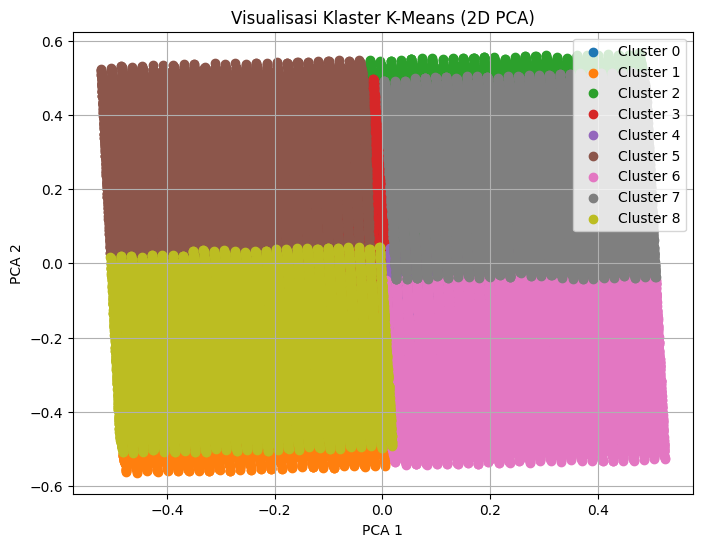

In [11]:
from sklearn.decomposition import PCA

# Reduksi dimensi dari 6D ke 2D untuk visualisasi
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Tambahkan kolom PCA ke dataframe
df['pca1'] = data_pca[:, 0]
df['pca2'] = data_pca[:, 1]

# Visualisasi hasil klaster dalam 2D
plt.figure(figsize=(8, 6))
for cluster_id in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['pca1'], cluster_data['pca2'], label=f'Cluster {cluster_id}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Klaster K-Means (2D PCA)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(data_scaled, df['cluster'])
print(f"\nSilhouette Score untuk k = {optimal_k}: {sil_score:.4f}")


Silhouette Score untuk k = 9: 0.2873
